Here, I've implemented a DBSCAN model using python language from scratch. Lets see how it works.


First, lets imports the libraries we want.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

The class below, is implemented to find the clusters using DBSCAN algorithm.
It has 6 methods:
##**init method:**##
This method initiates the parameters of the class and does some preproseccing on the data you give to it. The details are described in the code.

##**is core method:**##
This method checks if the point you passed to it is a core object or not. If it was a core object it will store its neighbor objects on a dictionary called neighbor_dict.

##**preprocessing method:**##
This method finds the core objects and their neighbors using the _is_core(self, d) method, before the main methods are invoked.

##**find neighbors method:**##
This method finds the density reachable objects in a cluster.At first, you should give the first core object of the cluster you want to find its data_points as the parameter, then, the method will find other density reachable objects inside that cluster using a recursive-dfs-like algorithm. The approach is simple, it lables the points that are directly density reachable from the core point you've specified on the parameter as points in one cluster, and it will invoke the same method on other core objects which are also directly density reachable from the core object in the parameter. This way the method will find all the density reachable objects in a cluster.

##**fit method:**##
This method finds out how many clusters there are and finds the points inside these clusters using the self._find_neighbors(self, data_point) method.

##**show clusters:**##
This method plots the clusters AND the noises our model found.
You should write the code snippet below after you invoked this method:
```
plt.legend()
plt.show()
```
Note that you should use this method only after the fit() method.

In [64]:
class DBSCAN:
  def __init__(self, eps, min_pts, data_set : np.array):
    self.eps = eps
    self.min_pts = min_pts
    self.cluster_num = 0
    self.neighbor_dict = {}
    row_num = data_set.shape[0]
    # add an extra column to see if a selected data point is a core object:
    zero_column_for_core = np.zeros((row_num, 1))
    data_set = np.hstack((data_set, zero_column_for_core))
    # add an extra column to see if a selected data point is visited befor
    # (the find_neighbors function is invoked on this point or not):
    zero_column_for_visited = np.zeros((row_num, 1))
    data_set = np.hstack((data_set, zero_column_for_visited))
    # add an extra column for cluster identification, minus 1 means the point is
    # a noise point and by default all points are noises:
    zero_column_for_clusers = np.zeros((row_num, 1)) - 1
    self.data_set = np.hstack((data_set, zero_column_for_clusers))
    # now lets determind the core objects and also their neighbors:
    self._preprocessing()

  # this method examins if a data_point is a core object based on eps and min_pts
  # and if it was a core object, the method stores its neighbor objects in a dictionary.
  def _is_core(self, d):
    neighbor_count = 0
    neighbor_list = []
    for data in self.data_set:
      if np.linalg.norm(d[0:2] - data[0:2]) <= self.eps:
        neighbor_count += 1
        neighbor_list.append(data)
    if neighbor_count >= self.min_pts:
      self.neighbor_dict[tuple(d[0:2])] = neighbor_list
      d[-3] = 1

  # this method is invoked in the __init__ method to determind core objects and their neighbor objects for further use.
  def _preprocessing(self):
    for data in self.data_set:
      self._is_core(data)

  # this method is used to assign the cluster number to the density reachable objects which are reachable from a core object.
  # it is a recursive method which performs like dfs(in order to find density reachable objects).
  def _find_neighbors(self, data_point):
    data_point[-2] = 1 # it is visited from now on.

    for data in self.neighbor_dict[tuple(data_point[0:2])]:
      data[-1] = self.cluster_num
      if data[-3] == 1 and data[-2] == 0: # if the point is core and it is not visited, so we should invoke the find_neighbor on it.
        self._find_neighbors(data)

  # this method is used to find clusters and points within that cluster using DBSCAN algorithm.
  def fit(self):
    cluster_exists = True
    while cluster_exists:
      cluster_exists = False
      for data_point in self.data_set:
        if data_point[-3] == 1: # the point is a core point.
          if data_point[-1] == -1: # then the point is not clustered yet and there still exists a cluster:
            cluster_exists = True
            self._find_neighbors(data_point)
            self.cluster_num += 1

  # invoke this method only after the fit method is invoked.
  def show_clusters(self):
    unique_labels = np.unique(self.data_set[:,-1])
    colors = ['red', 'blue', 'purple', 'orange']

    for label, color in zip(unique_labels, colors):
      if label == -1:
      # Points labeled as noise
        plt.scatter(self.data_set[self.data_set[:,-1] == label, 0], self.data_set[self.data_set[:,-1] == label, 1], color='black', label='Noise')
      else:
      # Points labeled with a cluster ID
        plt.scatter(self.data_set[self.data_set[:,-1] == label, 0], self.data_set[self.data_set[:,-1] == label, 1], color = color, label=f'Cluster {int(label)}')

    plt.title(f'{int(max(unique_labels))+1} Clusters Found with eps: {self.eps} and minpts: {self.min_pts}')



Loading the data and plotting the data:

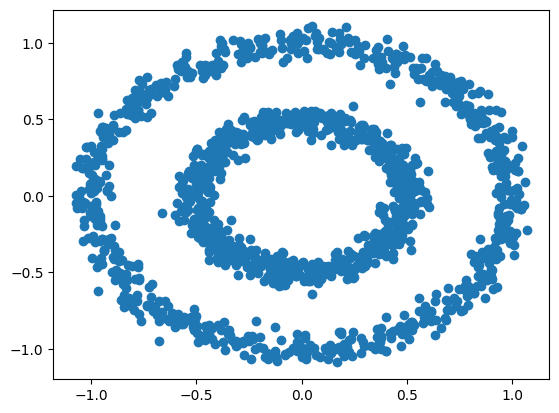

In [65]:
d1 = np.genfromtxt('d1.csv', delimiter=',')[1:]
plt.scatter(d1[:,0], d1[:,1])

Now use the DBSCAN class to find clusters:

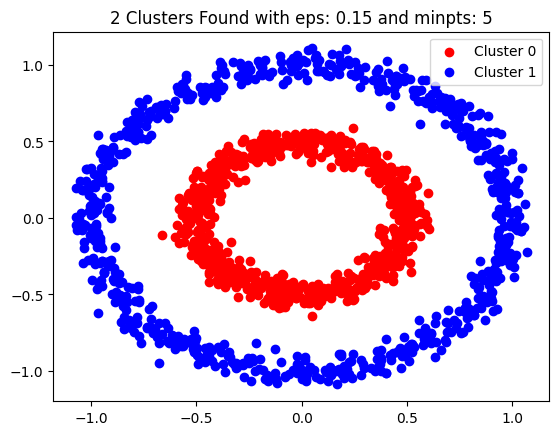

In [66]:
eps, min_pts = 0.15, 5
dbscn = DBSCAN(eps=eps, min_pts=min_pts, data_set=d1)
dbscn.fit()
dbscn.show_clusters()
plt.legend()
plt.show()

Lets test our DBSCAN class on another data set.

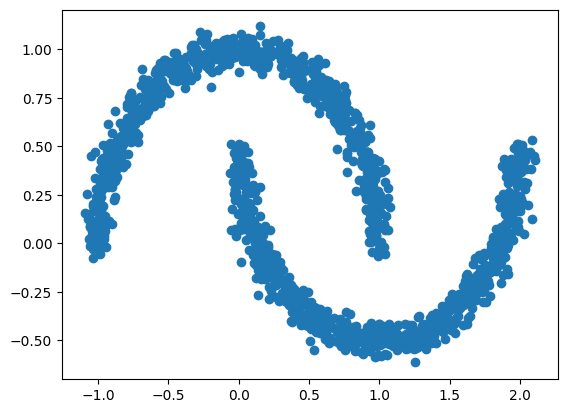

In [67]:
d2 = np.genfromtxt('d2.csv', delimiter=',')[1:]
plt.scatter(d2[:,0], d2[:,1])

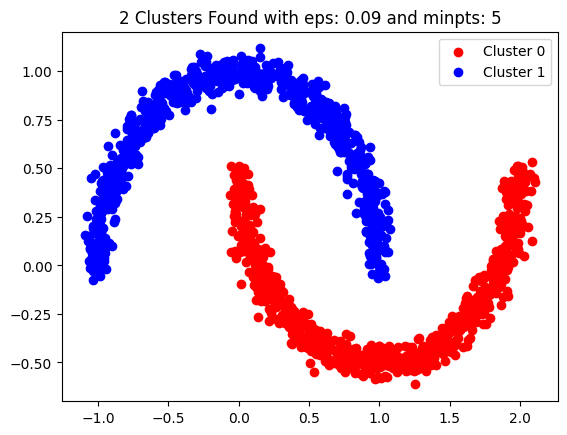

In [68]:
eps, min_pts = 0.09, 5
dbscn2 = DBSCAN(eps=eps, min_pts=min_pts, data_set=d2)
dbscn2.fit()
dbscn2.show_clusters()
plt.legend()
plt.show()